# Labrador Sea story

In [1]:
import Data

data,sta,date,lon,lat,P,d,t,s,rho,isop,si,ti = Data.AllData_variables()
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_rho,PaTh_d = Data.PaTh_variables()
listAllSta,listPaThSta,PaThDataSorted = Data.PaTh_varSorted()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


354.0 13.0


/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))
/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


354.0 13.0
354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.


354.0 13.0


In [7]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.figure as mfig
import matplotlib.image as mpimg
from matplotlib import gridspec

import netCDF4 as nc
import numpy as np
import scipy.io as sio
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import  psu_tools

from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [3]:
#dir()
#locals()
#globals()
listPaThSta

['K1',
 'LS2',
 'BB1',
 'BB3',
 'BB2',
 'CB2',
 'CB3',
 'CB4',
 '308/CAA8',
 'KC 500-2007',
 'KC 2000-2007',
 'KC 2700-2007',
 'A01-95',
 'L1.1-2009',
 'L2-2009',
 'L3-2009',
 '2']

# All stations; Pa & Th data

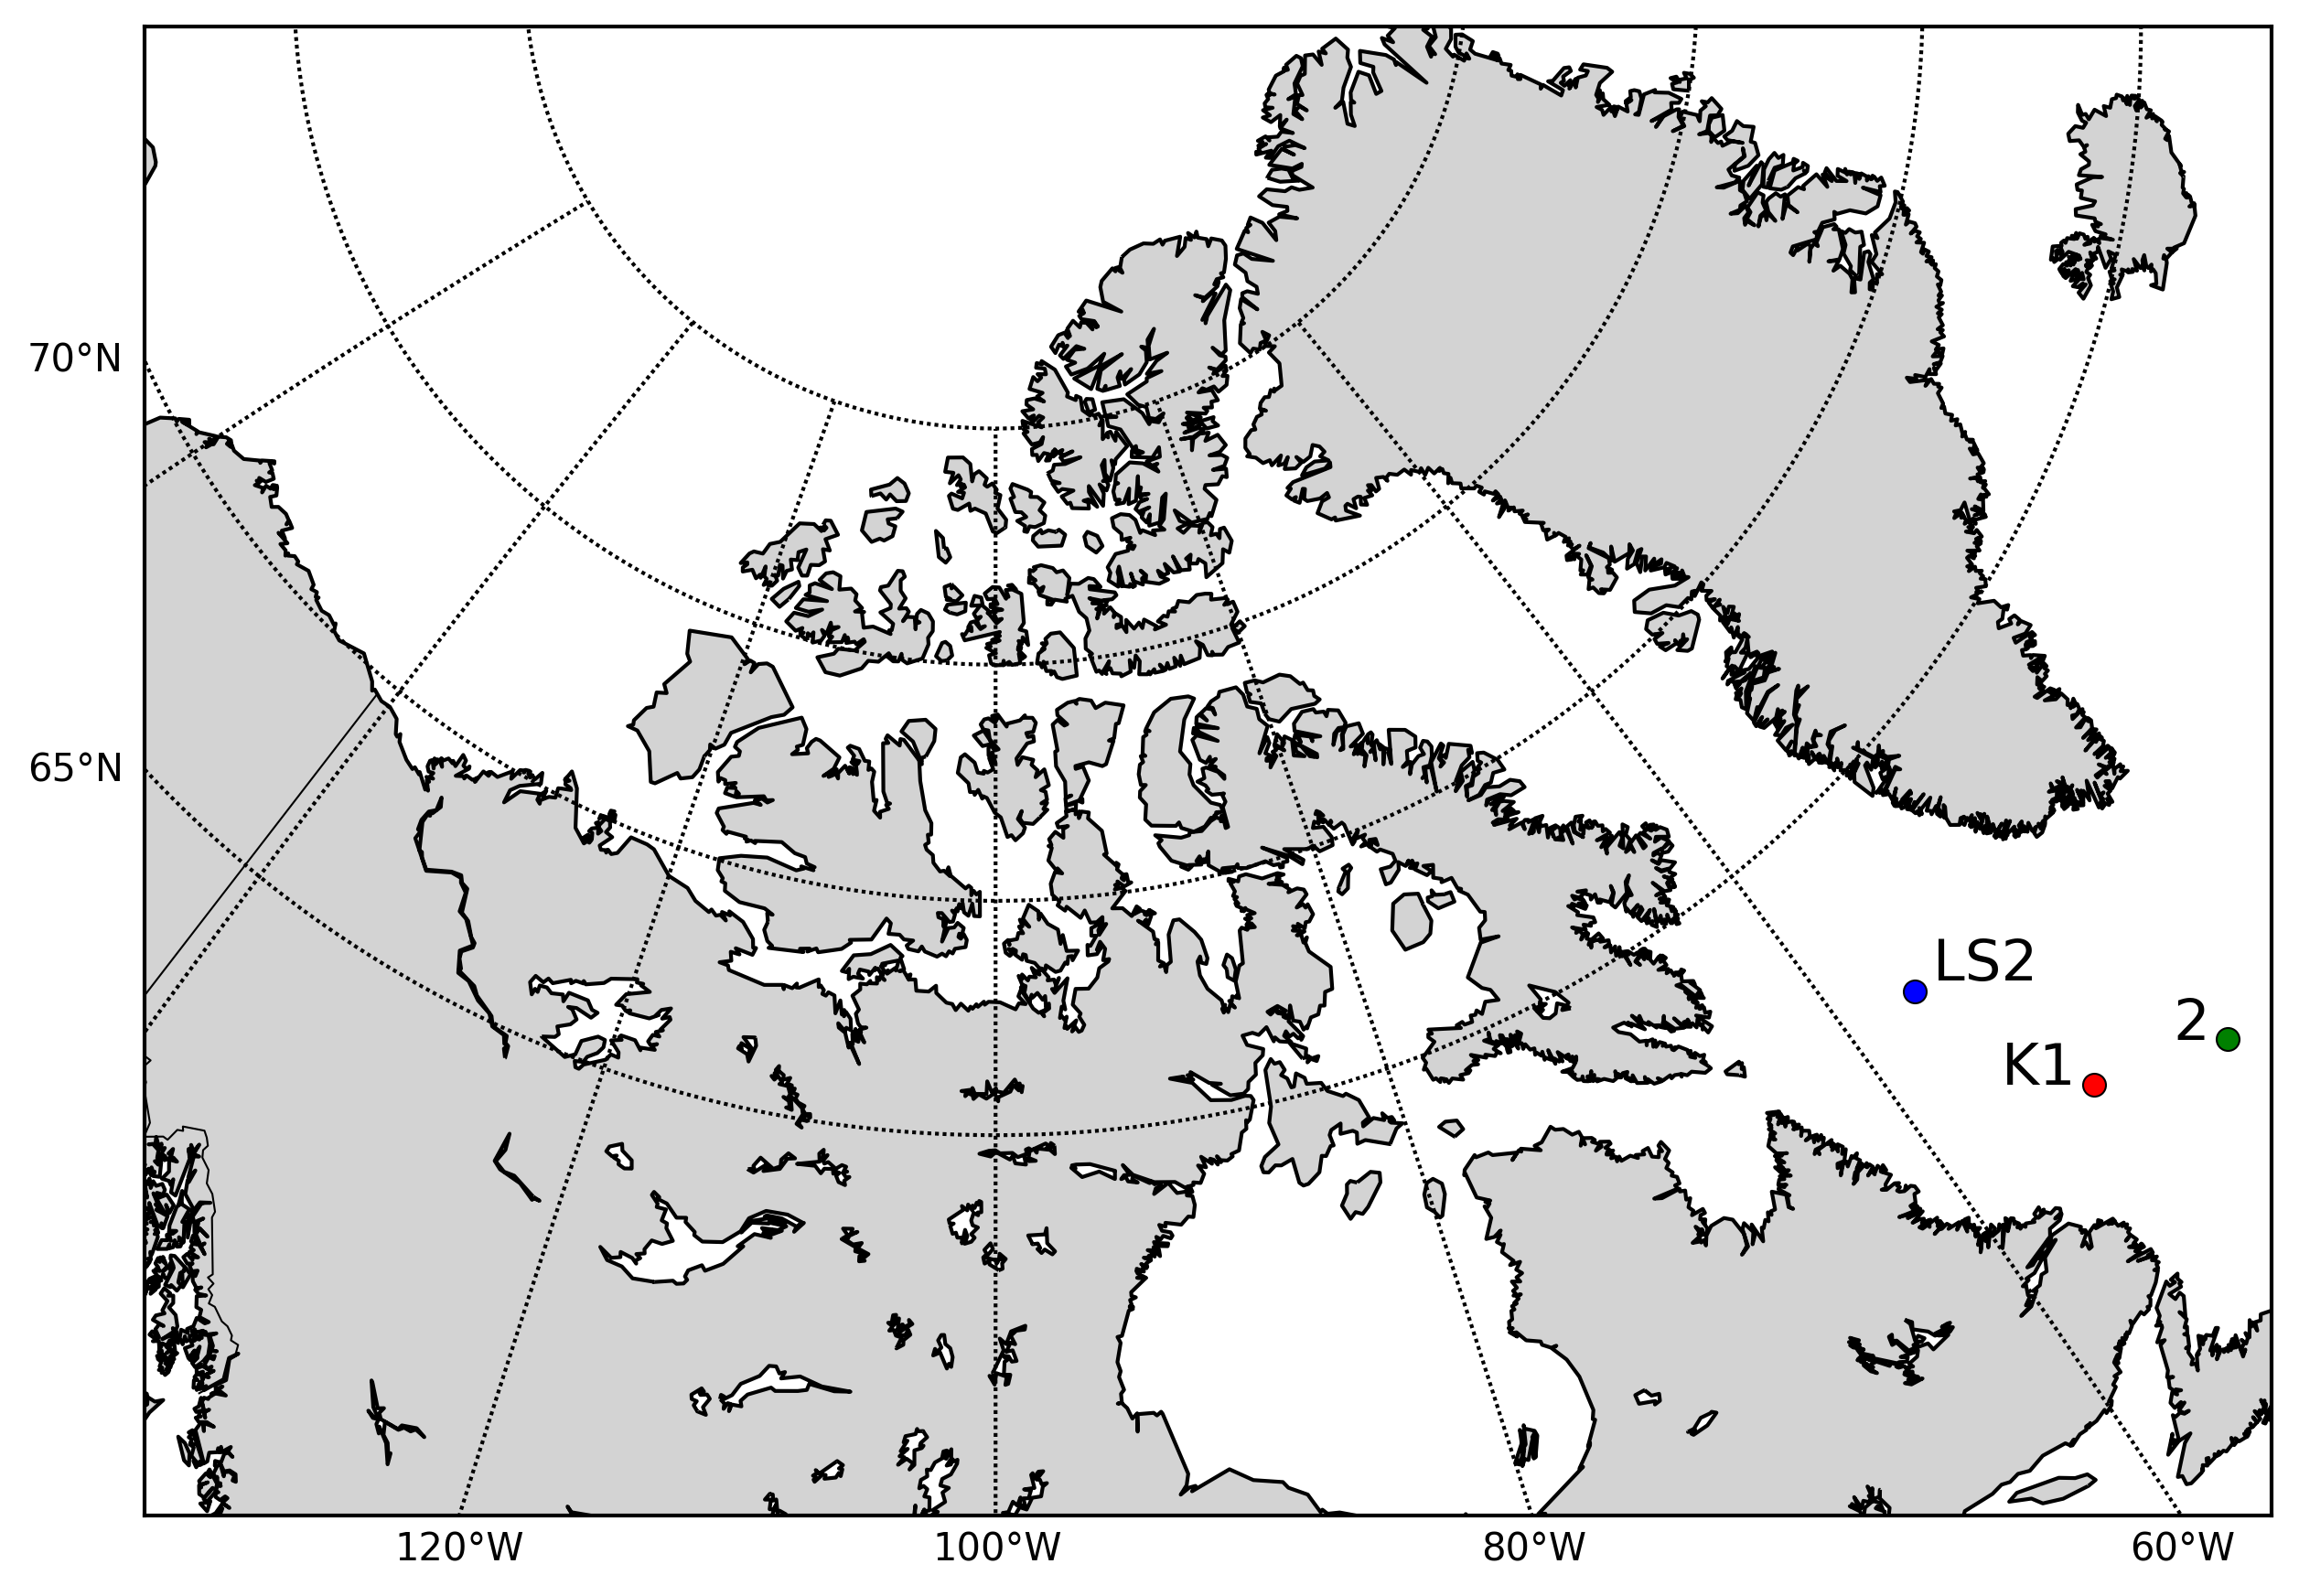

In [4]:
from wand.image import Image as WImage
img1= WImage(filename='/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/PaThStations-LScompar_Map.png')
img2= WImage(filename='/home/mgrenier/Documents/GEOTRACES_ARCTIC/moran-etal-epsl-2002-Fig1-map.pdf')
img3= WImage(filename='/home/mgrenier/Documents/GEOTRACES_ARCTIC/moran-etal-epsl-2002-Fig5-v2.pdf')
#img
img1

In [25]:
img1=mpimg.imread('/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/PaThStations-LScompar_Map.png')
img2=mpimg.imread('/home/mgrenier/Documents/GEOTRACES_ARCTIC/moran-etal-epsl-2002-Fig1-map.png')
img3=mpimg.imread('/home/mgrenier/Documents/GEOTRACES_ARCTIC/moran-etal-epsl-2002-Fig5.png')


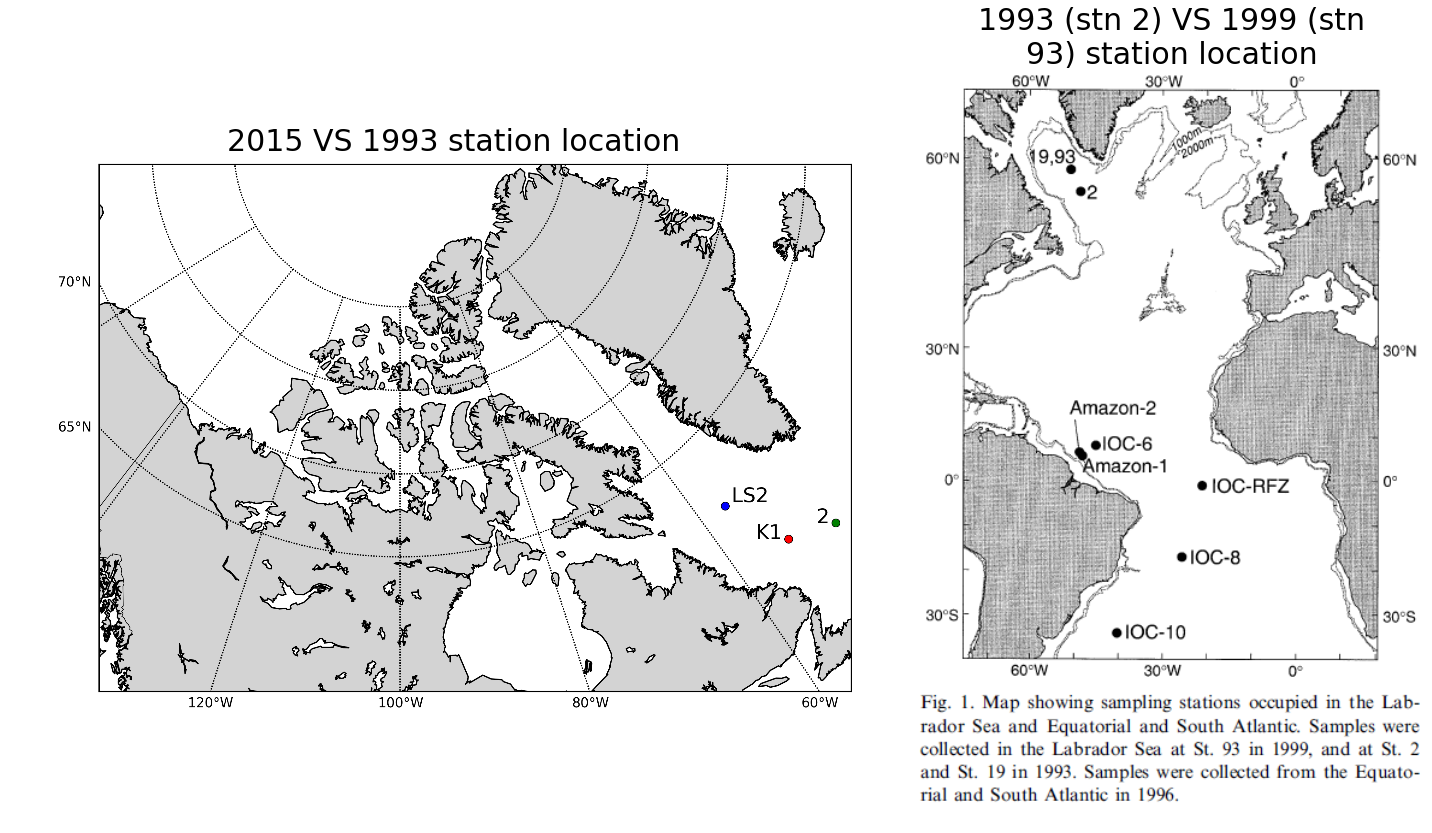

In [26]:
fig = plt.figure(figsize=(20, 30)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1.25]) 
ax0 = plt.subplot(gs[0])
ax0.imshow(img1)
ax1 = plt.subplot(gs[1])
ax1.imshow(img2)
ax0.axis('off')
ax1.axis('off')
ax0.set_title('2015 VS 1993 station location',fontsize=30)
ax1.set_title('1993 (stn 2) VS 1999 (stn\n93) station location',fontsize=30)
plt.tight_layout()

# Moran's et al, 2002 (EPSL):
### Suggest a cessation of deep convection between 1993 and 1999, leading to an increase of the intermediate/deep water age from 6 yr to 12 yr.

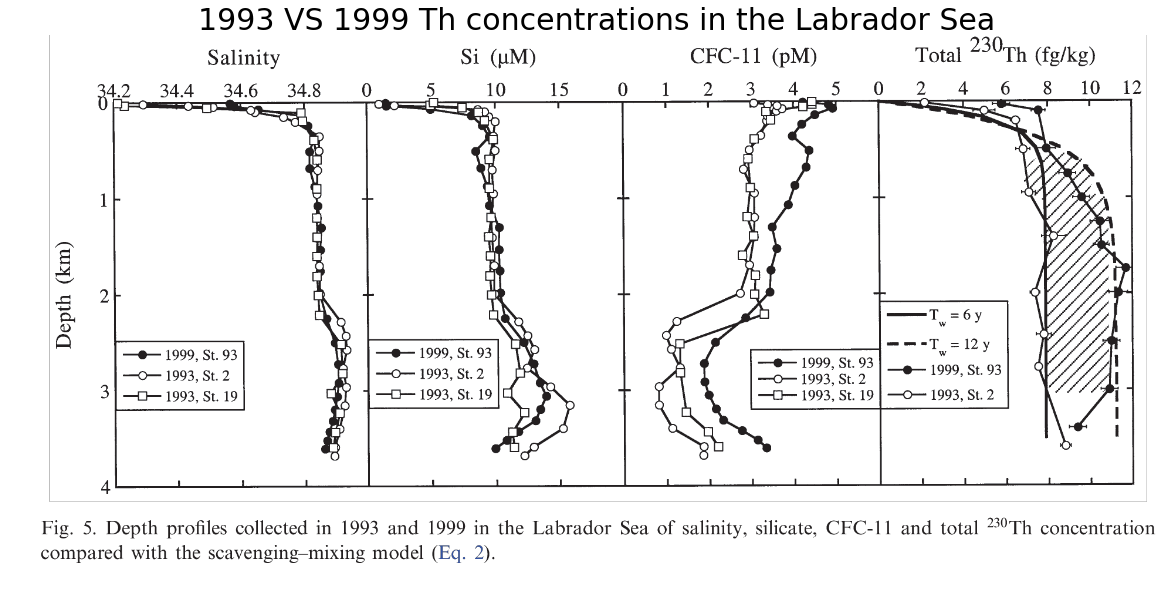

In [49]:
fig = plt.figure(figsize=(20, 10)) 
ax = plt.subplot()
ax.imshow(img3)
ax.axis('off')
ax.set_title('1993 VS 1999 Th concentrations in the Labrador Sea',fontsize=30)


# Comparison between stn 2 (1993) and K1 and LS2 (2015)
### Note: caution! 1993 refers to total  $\rm ^{230}Th$
### Decrease of Th concentrations between 1993 and 2015: Intensification of deep convection and/or stronger particle flux? 
### Relaxing LS2 profile compared to the more vertically constant K1 profile: weakening of the deep convection strength at LS2? Plus higher particle flux at K1?

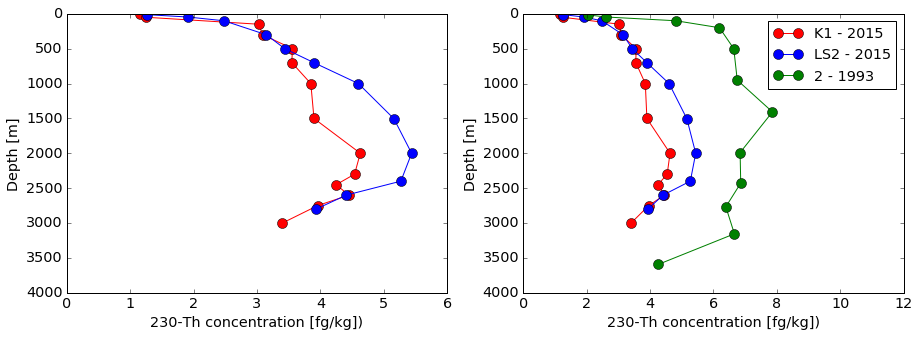

In [51]:
fig,((ax1,ax2)) = plt.subplots(1,2,facecolor='w',figsize=(15, 5)) 


#Plot Pa/Th sample profiles
for station,M,S,C in zip(('K1','LS2'),
                        ('o-','o-'),
                        (10,10,10),('red','blue')):     
    ax1.plot(PaThDataSorted.Th[sta == station],PaThDataSorted.d[sta == station],M,markersize=S,mew=0.5,color=C,label=station)
    ax1.set_xlim([0,6])
    ax1.set_ylim([0,4000])
    ax1.set_xlabel('230-Th concentration [fg/kg])')
    ax1.set_ylabel('Depth [m]')
    ax1.invert_yaxis()

for station,M,S,C,date in zip(('K1','LS2','2'),
                        ('o-','o-','o-'),
                        (10,10,10),('red','blue','green'),(' - 2015',' - 2015',' - 1993')):     
    ax2.plot(PaThDataSorted.Th[sta == station],PaThDataSorted.d[sta == station],M,markersize=S,mew=0.5,color=C,label=station+date)
    ax2.set_xlim([0,12])
    ax2.set_ylim([0,4000])
    ax2.set_xlabel('230-Th concentration [fg/kg])')
    ax2.set_ylabel('Depth [m]')
    ax2.invert_yaxis()
    ax2.legend()

## => 1-D model in the area of K1 to reproduce the profile evolution. Role of the particle flux evolution? Of the sea ice coverage evolution?